## Observations and Insights

* Ramicane was the most effective drug regimen in the Pycmaceuticals study on mice, showing the largest percentage decrease in tumor volume of 22%. The second most effective regimen was Capomulin showing an overall decrease of almost 20% in tumor volume. No other regimens were effective at reducing nor limiting tumor volume from increasing.

* The survival rate was greatest among the Capomulin regimen group at 84% and Propriva regimen resulted in the lowest survival rate at only 27%.

* 

## Dependencies and starter code

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files - store filepath in a variable
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [121]:
# Show just the header of file 1
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [122]:
# Show just the header of file 2
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [123]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [124]:
# Identify incomplete rows
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [125]:
# Check column types
mouse_study.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# GroupBy "Drug Regimen"
grouped_mouse_study = mouse_study.groupby(['Drug Regimen'])

grouped_mouse_study.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [47]:
# Calculate measures of central tendency of '' - mean, median, variance, standard deviation, and SEM

mean_volume = grouped_mouse_study[["Tumor Volume (mm3)"]].mean()
mean_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [46]:
median_volume = grouped_mouse_study[["Tumor Volume (mm3)"]].median()
median_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [48]:
variance_volume = grouped_mouse_study[["Tumor Volume (mm3)"]].var()
variance_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [50]:
std_volume = grouped_mouse_study[["Tumor Volume (mm3)"]].std()
std_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [51]:
sem_volume = grouped_mouse_study[["Tumor Volume (mm3)"]].sem()
sem_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [70]:
# Create a new DataFrame using statistics
tumor_vol_stat = {'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
                                 'Ramicane', 'Stelasyn', 'Zoniferol'],
               'Mean Tumor Volume (mm3)': [40.68, 52.59, 52.88, 55.24, 54.33, 54.03, 52.32, 40.22, 54.23, 53.24],
                'Median Tumor Volume (mm3)': [41.56, 51.78, 51.82, 53.70, 52.51, 52.29, 50.85, 40.67, 52.43, 51.82],
                'Variance Tumor Volume (mm3)': [24.95, 39.29, 43.13, 68.55, 66.17, 61.17, 42.35, 23.49, 59.45, 48.53],
                'STD Tumor Volume (mm3)': [4.99, 6.27, 6.57, 8.28, 8.13, 7.82, 6.51, 4.85, 7.71, 6.97],
                'SEM Tumor Volume (mm3)': [0.33, 0.47, 0.49, 0.60, 0.60, 0.58, 0.51, 0.32, 0.57, 0.52],
}

tumor_vol_stat = pd.DataFrame(data=tumor_vol_stat)
tumor_vol_stat

,Drug Regimen,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),STD Tumor Volume (mm3),SEM Tumor Volume (mm3)
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.32,50.85,42.35,6.51,0.51
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


## Bar plots

In [71]:
# Determine the number of data points for each treatment regimen

grouped_mouse_study.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [73]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

mouse_metadata["Drug Regimen"].value_counts().plot.barh()
plt.show()

<IPython.core.display.Javascript object>


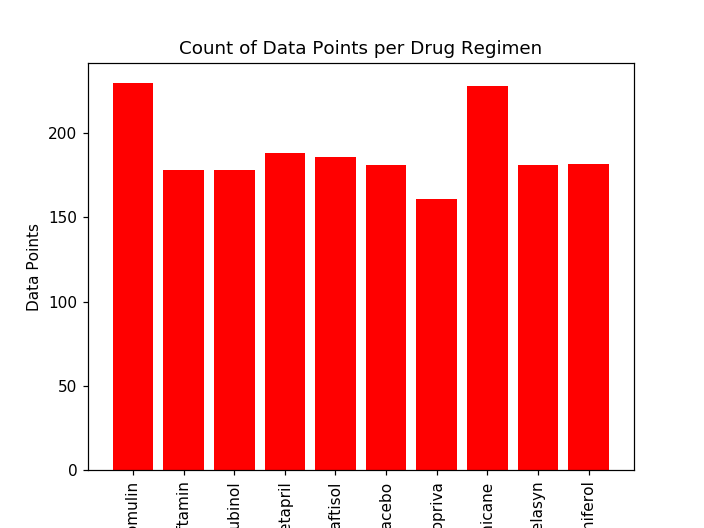

In [74]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

%matplotlib notebook

drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn',
                'Zoniferol']
data_points = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

plt.bar(drug_regimen, data_points, color="r")
plt.xticks(drug_regimen, rotation=90)

plt.title("Count of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

## Pie plots

In [116]:
# Determine the distribution of female versus male mice

sex_counts = mouse_metadata["Sex"].value_counts()
sex_counts

Male      125
Female    124
Name: Sex, dtype: int64

In [117]:
# Calculate the survival rate of mice Grouped by Drug and Timepoint

survival_count = mouse_study.groupby(["Drug Regimen", "Timepoint"]).count()["Tumor Volume (mm3)"]
survival_count = pd.DataFrame({"Mouse Count": survival_count})

survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug Regimen")["Mouse Count"]

survival_count_pivot

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,24,25
5,25,21,25,23,23,24,25,25,23,24
10,25,20,21,22,21,24,23,24,21,22
15,24,19,21,19,21,20,17,24,21,21
20,23,18,20,19,20,19,17,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


<IPython.core.display.Javascript object>


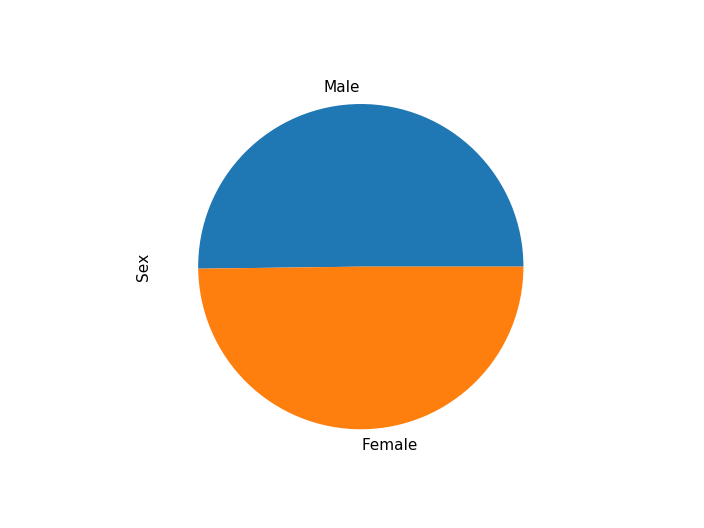

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib notebook
mouse_metadata["Sex"].value_counts().plot(kind='pie')
plt.show()

<IPython.core.display.Javascript object>


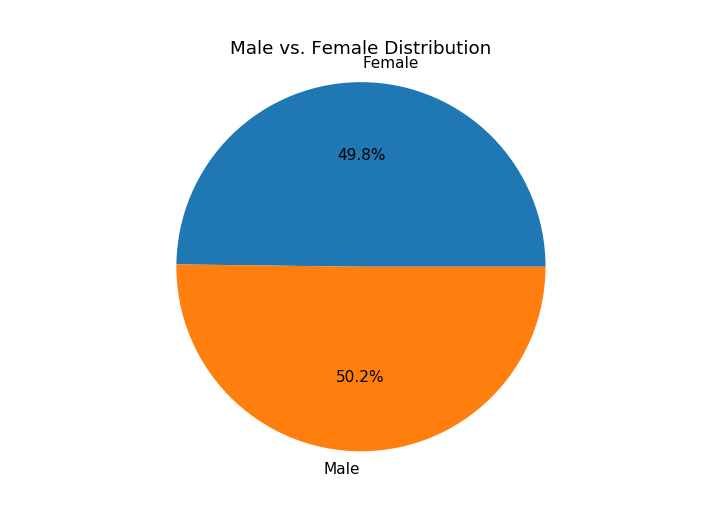

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook

count = [124, 125]
sex = 'Female', 'Male'


plt.pie(count, labels=sex,autopct='%1.1f%%')
plt.title('Male vs. Female Distribution')
plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

In [85]:
# Determine the four most promising treatment regimens. (Ramicane, Capomulin, Ceftamin, Zoniferol)

tumor_pct_change =  100 * (tumor_pivot_mean_vol.iloc[-1] - tumor_pivot_mean_vol.iloc[0]) / tumor_pivot_mean_vol.iloc[0]
tumor_pct_change_sem =  100 * (tumor_pivot_mean_vol.iloc[-1] - tumor_pivot_mean_vol.iloc[0]) / tumor_pivot_mean_vol.iloc[0]

tumor_pct_change

Drug Regimen
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [99]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# (Ramicane, Capomulin, Ceftamin, Zoniferol)

fin_tumor_vol = mouse_study[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
fin_tumor_vol = fin_tumor_vol.set_index("Mouse ID")

fin_tumor_vol.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
k403,Ramicane,0,45.000000
k403,Ramicane,5,38.825898
k403,Ramicane,10,35.014271
k403,Ramicane,15,34.223992
k403,Ramicane,20,32.997729


In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.


In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib notebook

## Line and scatter plots

In [109]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(mouse_study["Timepoint"], ["Tumor Volume (mm3)"])

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1893,) and (1,)

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
%matplotlib notebook

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor 
# volume for the Capomulin regimen